# 该示例程序我们来分析两两数值型特征之间的相关性
我们以Kaggle2016年底的Allstate Claims Severity竞赛数据为例，因为该数据中有些特征之间相关性很高
竞赛官网：https://www.kaggle.com/c/allstate-claims-severity/data

首先 import 必要的模块

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

读取数据

In [2]:
# Read raw data from the file
# path to where the data lies
dpath = './data/'

train = pd.read_csv(dpath + "AllstateClaimsSeverity_train.csv") 

#Display the first five rows to get a feel of the data
print(train.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9   ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B   ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B   ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B   ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B   ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  

In [3]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


## Data Interaction

### Correlation

Correlation tells relation between two attributes.
Correlation requires continous data. Hence, ignore categorical data

In [4]:
#range of features considered （前面有id 和116个类别型特征cat1-cat116）
split = 117 
#number of features considered （cont1-cont14 和loss， loss为标签）
size = 15
#create a dataframe with only continuous features
data=train.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr().abs()


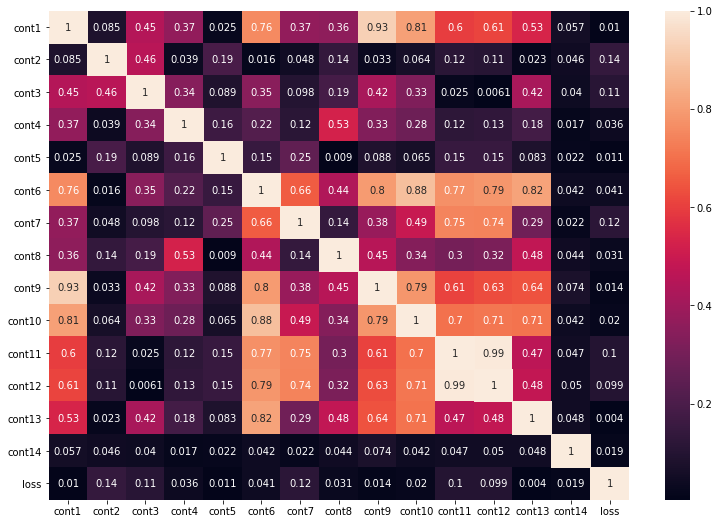

In [6]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)
plt.show()

In [7]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


Strong correlation is observed between the following pairs
This represents an opportunity to reduce the feature set through transformations such as PCA

## Scatter plot

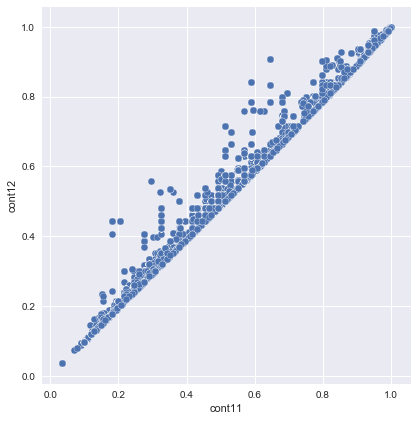

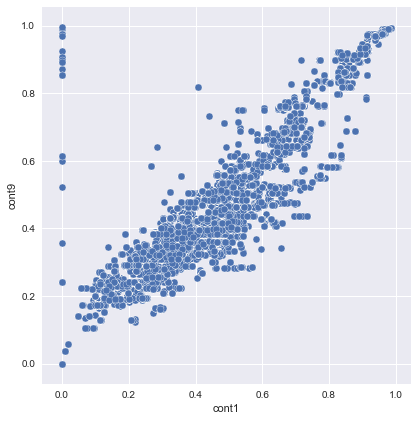

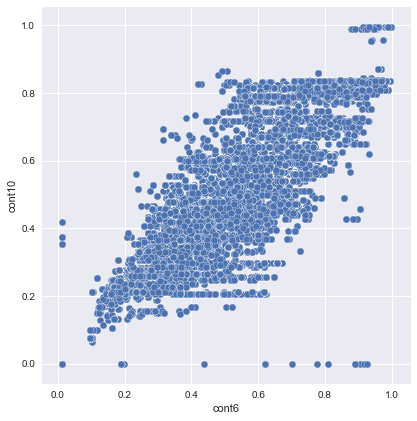

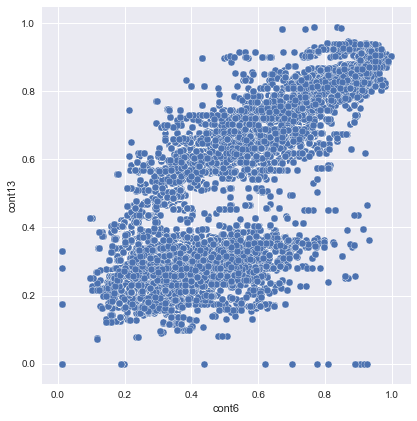

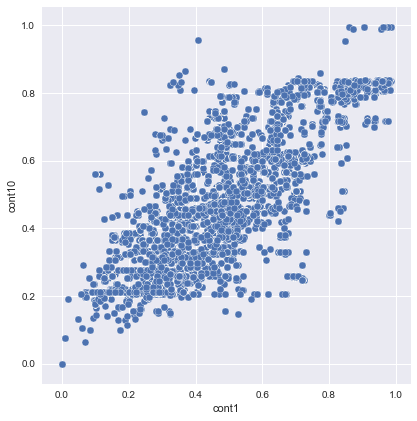

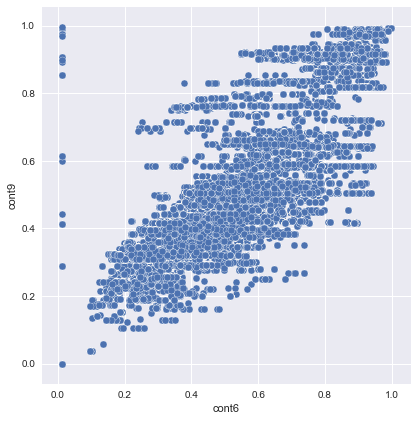

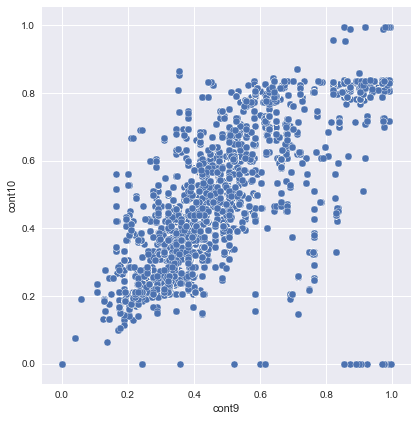

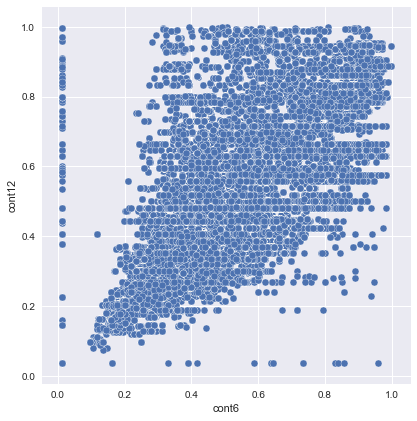

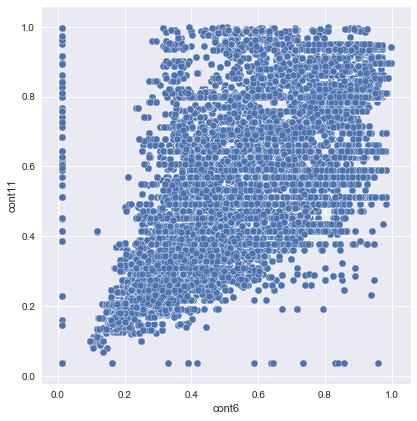

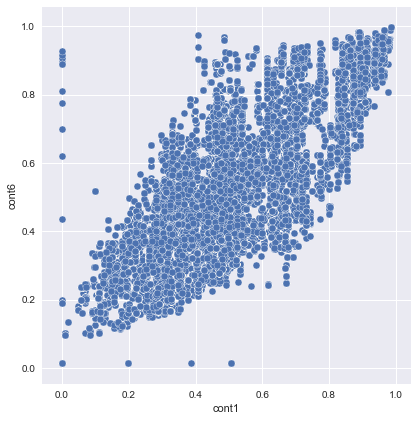

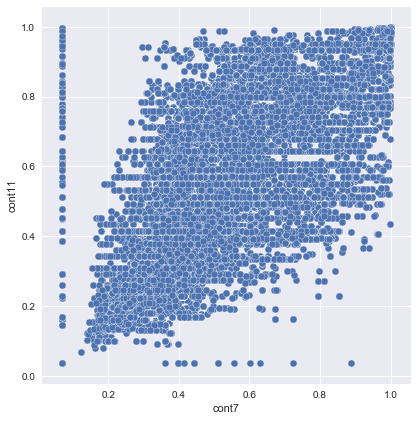

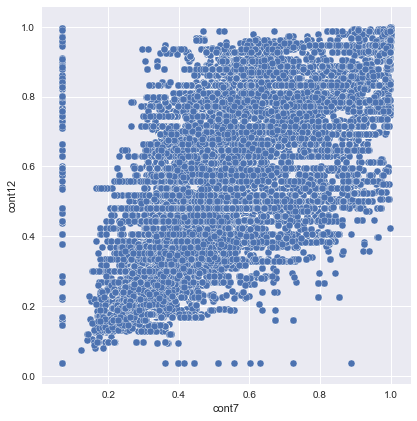

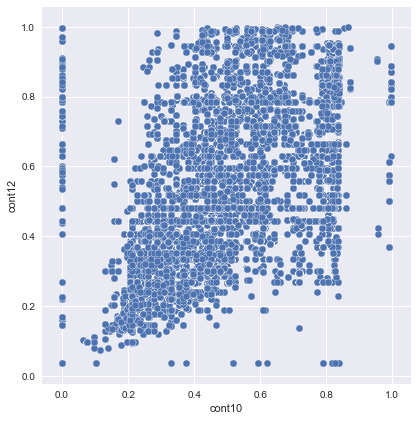

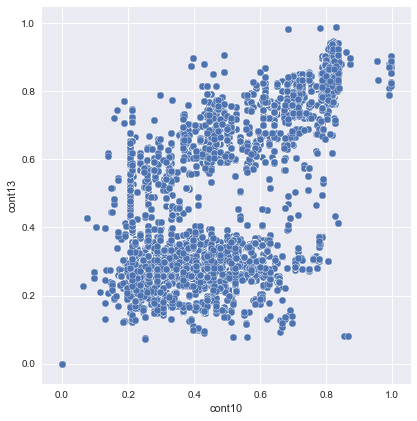

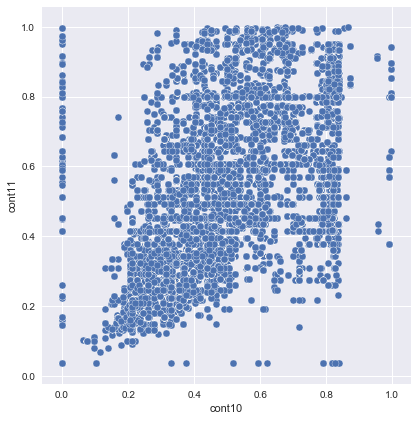

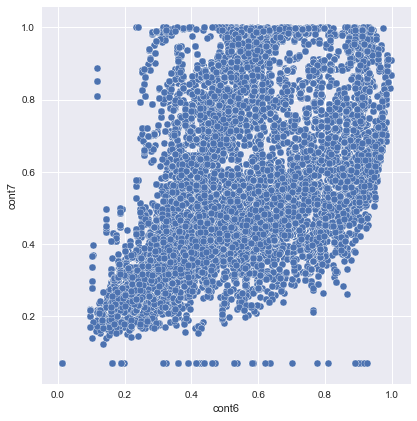

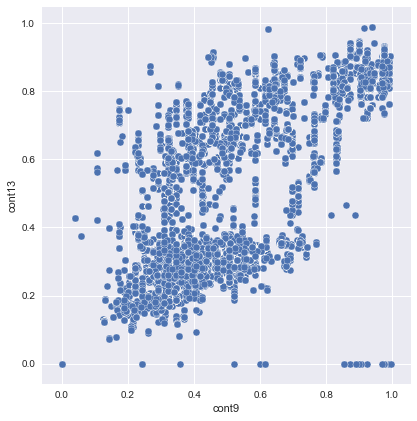

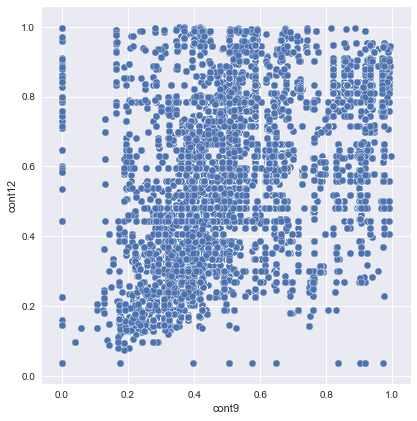

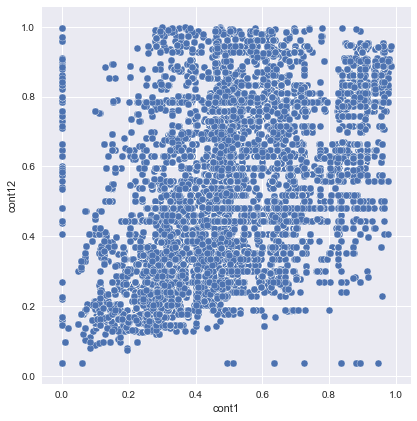

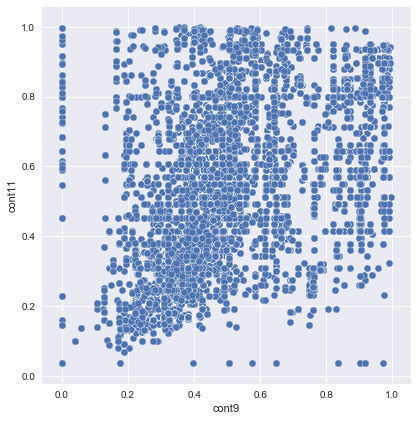

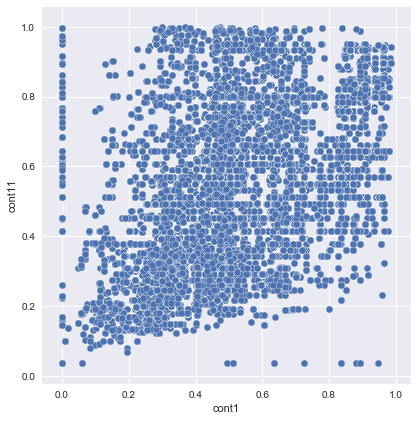

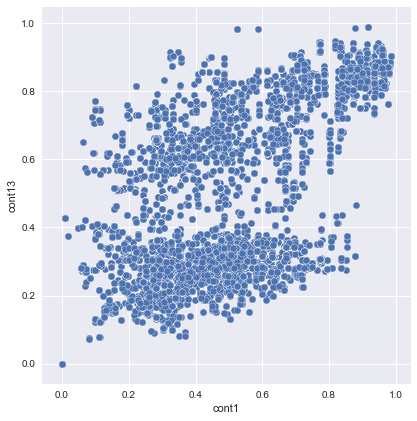

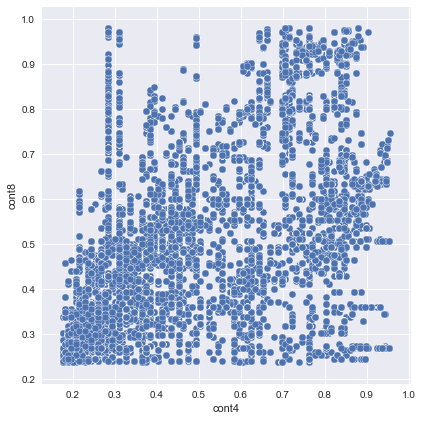

In [20]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(train, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

cont11 and cont12 give an almost linear pattern...one must be removed
#cont1 and cont9 are highly correlated ...either of them could be safely removed 
#cont6 and cont10 show very good correlation too